# Lab 10: Visual Analytics Data application using Streamlit and Machine Learning (Evaluable)

# Lab goals:
In this project, we will build a Visual Analytics app that combines Streamlit and Machine Learning. In particular, our Data web app will explore and predict the salary of the software developers depending on the country, experience and level of education. 

As we have done during the course, we will follow the end-to-end **Machine Learning process**:
1. Data understanding and preparation: exploration of the dataset and feature engineering (missing values, outlier identification, categorical variables management)
2. Model Training: training a regression model. Analysis of metrics (i.e. R2_score, mean squared error,...)
3. Creating a Visual Analytics web app based on Streamlit to facilitate the exploration of data and prediction of the salary.

# Practice Information:
**Due date:** By end of November, 15th (23:55h)

**Submission procedure:** via Moodle.

**Name:** Guillem Escriba Molto

**NIA:** 242123


# 0. Context:  

We work in a Human Resources Consultant company supporting to the business consultant team. A common request from our customers from the IT sector is a salary recommendation to be applied to their software development employees. 
Therefore, we have been requested to build a Web app with two minimum goals:
- 1 Exploration of salaries per country and experience
- 2 Prediction of a salary based on country, experience and education

We have access to an annual survey by Stack Overflow where we can find more than 67K software developers' answers. Part of the survey includes salary, experience, country, full/partial time employee, language, demographic information and so on.

Taking into consideration the request and this amazing survey you should develop your **own Visual Analytics Data Web** with two main parts:
- a) This Jupyter Notebook to explore the data (i.e. EDA), prepare the data and build a Machine Learning model that predicts the salary of a software employee at least based on **Country**, **Education** and **Experience** variables  
- b) A Streamlit app to explore the data and execute the salary prediction

# 1. Data Gathering
In the survey_results_schema.csv and the survey_results_public.csv you will obtain the schema of the survey and the responses.

Let's import some basic libraries and upload the **survey_results_public.csv** file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [40]:
df = pd.read_csv("Webapp/Data/survey_results_public.csv")

# Alternative path
#df = pd.read_csv(survey_results_public.csv")

Let's explore the data:

In [41]:
# Copy of df for EXTRA 
df_extra = df.copy()

display(df.head())
display(df.info())

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

None

# 2. Data Exploration and Data Wrangling 

**EX1** Let's select the variables we are interested in: `Country`, `Education`, `YearsCodePro`, `Employment` and `ConvertedCompYearly`. Rename `ConvertedCompYearly` to `Salary`.

Let's see the data again

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [5]:
# Columns
selected_columns = ['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedCompYearly']
df = df[selected_columns]

# Rename 
df = df.rename(columns={'ConvertedCompYearly': 'Salary'})
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Employed, full-time",NaN


**EX2** Remove the registers with any null in the features and verify all registers are not null

In [6]:
# Remove nulls
df = df.dropna()

# Check if there are nulls
if df.isnull().values.any():
    print("There are some null values in the dataframe.")
else:
    print("There are no null values in the dataframe.")

display(df.info())

There are no null values in the dataframe.
<class 'pandas.core.frame.DataFrame'>
Index: 37919 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       37919 non-null  object 
 1   EdLevel       37919 non-null  object 
 2   YearsCodePro  37919 non-null  object 
 3   Employment    37919 non-null  object 
 4   Salary        37919 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


None

**EX3** Select the registers in the dataset that are full-employed and remove "employment" column

In [7]:
# Select rows where 'Employment' is 'full-time'
df = df[df['Employment'] == 'Employed, full-time']

# Drop the 'Employment' column
df = df.drop(columns=['Employment'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31382 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       31382 non-null  object 
 1   EdLevel       31382 non-null  object 
 2   YearsCodePro  31382 non-null  object 
 3   Salary        31382 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


**EX4** Count the regiters per country and move all countries with less than cut-off registers to "Other"

In [9]:
# Number of registers per country
country_counts = df['Country'].value_counts()

# Top 20
display(country_counts.head(20))

# Statistics
display(country_counts.describe())

Country
United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
France                                                  1126
Brazil                                                  1014
Spain                                                    858
Netherlands                                              701
Australia                                                700
Italy                                                    667
Poland                                                   572
Sweden                                                   561
Russian Federation                                       425
Switzerland                                              416
Turkey                                                   361
Israel          

count     155.000000
mean      202.464516
std       714.489740
min         1.000000
25%         6.000000
50%        24.000000
75%       145.500000
max      7858.000000
Name: count, dtype: float64

In [10]:
# Min amount of registers to use
cutoff = 250  

# Count the number of records per country
country_counts = df['Country'].value_counts()

# Create a list of countries that meet the cutoff
valid_countries = country_counts[country_counts >= cutoff].index.tolist()
display(f"Selected countries: {len(valid_countries)}")


# Replace countries that don't meet the cutoff with 'Other'
df['Country'] = df['Country'].apply(lambda x: x if x in valid_countries else 'Other')

display(df)

'Selected countries: 22'

,Country,EdLevel,YearsCodePro,Salary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,60307.0
12,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,65000.0
...,...,...,...,...
73116,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",16,115000.0
73118,Other,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,57720.0
73119,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1,70000.0
73120,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,35192.0


**EX5** To analyze the distribution of salaries per countries, build a boxplot per `country` and `salary`.

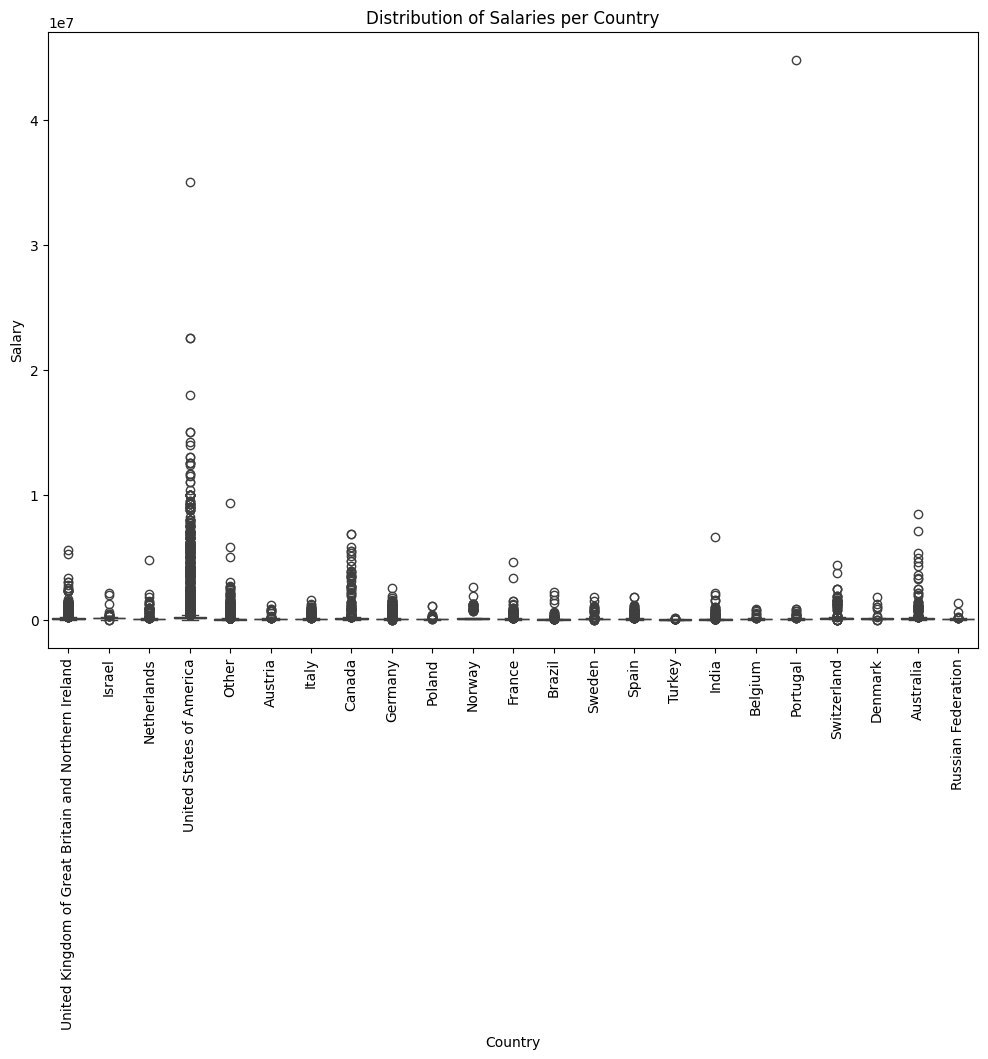

In [11]:
# Create a boxplot to analyze the distribution of salaries per country
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='Salary', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Salaries per Country')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.show()

**EX6** To improve the resolution, filter the dataset based on salary between 10K and 250K and verify the distribution of salaries per country. Which are the most relevant insights based on these new boxplots?


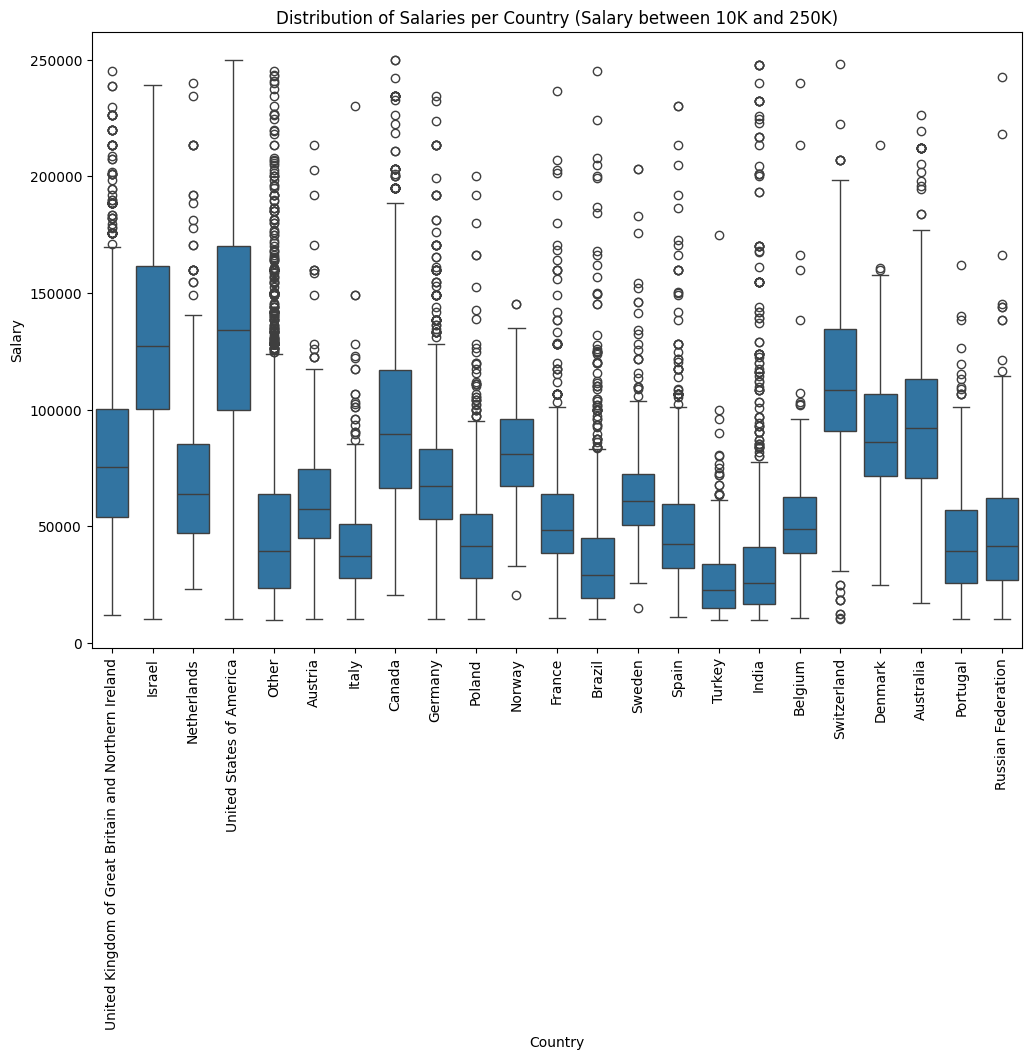

In [12]:
# Filter the dataset based on salary between 10K and 250K
df = df[(df['Salary'] >= 10000) & (df['Salary'] <= 250000)]

# Create a boxplot to analyze the distribution of salaries per country
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='Salary', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Salaries per Country (Salary between 10K and 250K)')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.show()

**SOLUTION:** As we can see in the boxplots, there are real differences between the salaries in different countries, for example,  Turkey has the lowest minimum value, the lowest maximum value, even with the outliers, the lowest quartiles and its likely to have the lowest average. On the other hand, USA, has the highest maximum, the highest quartiles, and the highest average. Also, we can clearly see that the amount of outliers vary completely from one country to another, again USA, does not have any outlier, it makes sense since it covers almost all the range of values of "Salary" and it contains also the minimum, 0 and the maximum 250k. However, there are some countries with several outliers, such as India, even having one of the lowest salaries, it also reaches salaries of 250k, it may indicate that there are a lot of variance between the salaries in India. Of course, "Other" has the biggest amount of outliers for obvious reasons. Talking again of variance, we can see the lowest one in Norwey, with just 2 outliers and the smallest range of "Salary" of all the plotted countries.  

Let's prepare the `YearsCodePro` to integer. We will build a new **clean_experience()** function to encode over 50 years and below 0.5 years of experience respectively.

In [13]:
print(type(df["YearsCodePro"]))
df["YearsCodePro"].unique()

<class 'pandas.core.series.Series'>


array(['5', '17', '6', '2', '4', '10', '22', '20', '9', '14', '21', '15',
       '3', '25', '7', '8', '12', '19', '24', '1', '11', '23',
       'Less than 1 year', '18', '37', '46', '13', '32', '27', '28', '16',
       '31', '30', '34', '35', '26', '42', '38', '36', '40', '41', '29',
       '33', '39', '48', '45', '44', '43', 'More than 50 years', '47',
       '49', '50'], dtype=object)

In [14]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27080 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       27080 non-null  object 
 1   EdLevel       27080 non-null  object 
 2   YearsCodePro  27080 non-null  float64
 3   Salary        27080 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.0+ MB


Let's normalize the different values of the `EdLevel`. We will build a new **clean_education** function to normalize the education levels.

In [16]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else', 'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [17]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [18]:
df["EdLevel"].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [19]:
# Save the dataset for streamlit app
df.to_csv('Webapp/Data/dataset_overview.csv', index=False)

# Alternative path
#df.to_csv('dataset_model.csv', index=False)

**EX7** Encode using **LabelEncoder** function the `EdLevel` and `Country` columns. Store them into the same `EdLevel` and `Country` columns. 

In [20]:
# Create label encoders for each column
le_education = LabelEncoder()
le_country = LabelEncoder()

# Encode the 'EdLevel' and 'Country'
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['Country'] = le_country.fit_transform(df['Country'])

df.head(5)

,Country,EdLevel,YearsCodePro,Salary
2,21,2,5.0,40205.0
3,9,0,17.0,215232.0
8,11,2,6.0,49056.0
10,21,0,2.0,60307.0
12,22,0,5.0,65000.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27080 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       27080 non-null  int32  
 1   EdLevel       27080 non-null  int32  
 2   YearsCodePro  27080 non-null  float64
 3   Salary        27080 non-null  float64
dtypes: float64(2), int32(2)
memory usage: 846.2 KB


In [22]:
# Save the dataset for streamlit app
df.to_csv('Webapp/Data/dataset_model.csv', index=False)

# Alternative path
#df.to_csv('dataset_model.csv', index=False)

# 3. Modelling 

We are ready to build a ML model to predict the salary based on the 3 variables: country, education level and years of experience. 

**EX8** Split into train and test dataset and verify the length of all datasets.

In [23]:
X = df[['Country', 'EdLevel', 'YearsCodePro']]  # Features 
y = df['Salary']  # Target variable 

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the lengths of all datasets
print("Length of X_train:", len(X_train))
print("Length of X_test:", len(X_test))
print("Length of y_train:", len(y_train))
print("Length of y_test:", len(y_test))

Length of X_train: 21664
Length of X_test: 5416
Length of y_train: 21664
Length of y_test: 5416


**EX9** Apply a Linear Regression model to fit and evaluate the performance of the prediction based on the mean squared error.

In [24]:
# Fit the model 
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the MSE
mse1 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse1)

Mean Squared Error (MSE): 2056839989.9942524


**EX10** Repeat the **EX9** using a RandomForest model. Has it improved the mean squared error?

In [25]:
# Fit the model 
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the MSE
mse2 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse2)

Mean Squared Error (MSE): 1216337233.4505591


In [26]:
print(f'MSE LR: {mse1} vs MSE RF: {mse2}')
error_reduction = round((mse1-mse2)*100/mse1,2)
print(f'The RF reduces the MSE in {error_reduction}% from LR')

MSE LR: 2056839989.9942524 vs MSE RF: 1216337233.4505591
The RF reduces the MSE in 40.86% from LR


**SOLUTION:** Yes, as we have seen, the MSE of the Random Forest is better than the Linear Regression one, indicating that the Random Forest makes more accurate predictions.

In order to find the best hyperparameters for the regression model, we will use **GridsearchCV** apply to the Random Forest.

In [27]:
max_depth = [6,8,10,12]
n_estimatorsint=[50,100,200,300,500]
parameters = {"max_depth": max_depth, "n_estimators": n_estimatorsint}

random_forest_reg = RandomForestRegressor(random_state=42)

gs = GridSearchCV(random_forest_reg, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'n_estimators': [50, 100, 200, 300, 500]},
             scoring='neg_mean_squared_error')

Once calculate the **best estimator**, we will apply to our use case and calculate the **mean squared error**.

In [28]:
random_forest_reg = gs.best_estimator_

random_forest_reg.fit(X_train, y_train)
y_pred_test = random_forest_reg.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("${:,.02f}".format(error))

$34,031.82


**EX11** Calculate the performance based on **R2 score** of the regression model fitted with the best estimator. Which is your consideration about the performance of the model? Justify your answer.

In [29]:
# Make predictions on the test data using the best estimator
y_pred = random_forest_reg.predict(X_test)  

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# Print the R2 score
print("R2 Score:", r2)

R2 Score: 0.5796208147348584


**SOLUTION:**  The R2 score, also known as the coefficient of determination, measures how well a regression model explains the variance of the target variable. It goes in a range between 0 to 1, where a higher value indicates a higher varience explanation. So, the higher, the better. In our case we have obtained 0.579 which is aproximately 57'9% of the variance of the model. In conclusion, this R2 score indicates that the RF capturates a significant portion of the variability in the tarfet, but it can be improved.

**EX12** Make a prediction for a software developer in `Spain`, with `Master's degree` and 15 years of experience.

In [30]:
# Create a DataFrame with the input values
X_sample = pd.DataFrame({'Country': le_country.transform(['Spain']), 'EdLevel': le_education.transform(['Master’s degree']), 'YearsCodePro': 15})


# Make a prediction for the new data
predicted_salary = random_forest_reg.predict(X_sample)

# Print the predicted salary
print("Predicted Salary:", predicted_salary[0])

Predicted Salary: 65360.44738188899


# 4. Communicating results through a Visual Analytics web tool.

We are ready to share our results with our Consultant team and customers. To do it, we will create a Data product using the Streamlit framework. This web app should have a least 2 tabs: one for data exploration and other for salary prediction.

Before building this app, you should store the ML model and labencoders in a **pickle** format as follows. This pickle file will be the one you need to call in your web app.

In [31]:

import pickle

In [32]:
data = {"model": random_forest_reg, "le_country": le_country, "le_education": le_education}
with open('Webapp/Models/saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)
    
# Alternative path
#with open('saved_steps.pkl', 'wb') as file:
#    pickle.dump(data, file)

You can verify the pickle file works as follows: first, open the file storing into 3 variables the regressor, the labencoder for country and the labencoder for education.

In [33]:
with open('Webapp/Models/saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

# Alternative path
#with open('saved_steps.pkl', 'rb') as file:
#    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

You can also make a prediction with a sample as follows:

In [34]:
y_pred = regressor_loaded.predict(X_sample)
 

Now, you are ready to go to next step: building the Visual Analytics tool based on Streamlit. Recall, your app should have a main .py file (for instante, **my_app.py**) and a folder called **pages** with all .py files you want to show in your app.

# EXTRA: ADDITIONAL APPROACH

In the following section we can see an additional approach to the prediction, instead of using 3 features, we use some of the ones with more correlation with the 'Salary'.

## Data preparation

In [42]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# EXTRA

# Rename 
df_extra = df_extra.rename(columns={'ConvertedCompYearly': 'Salary'})

# Identify non-numeric columns
non_numeric_columns = df_extra.select_dtypes(exclude=['int', 'float']).columns

# Create a copy of the DataFrame for encoding
df_encoded = df_extra.copy()

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to non-numeric columns
for column in non_numeric_columns:
    df_encoded[column] = label_encoder.fit_transform(df_extra[column])

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Calculate the correlation of all variables with respect to 'Salary'
correlation_with_salary = correlation_matrix['Salary'].abs().sort_values(ascending=False)

# Select the top 10 columns with the highest absolute correlation
top_10_correlated_variables = correlation_with_salary[0:11]  

# Display the top 10 correlated variables
display(top_10_correlated_variables)

# Select the top 10 correlated columns
top_10_columns = top_10_correlated_variables.index.tolist()
top_10_columns.append('Employment')
top_10_df = df_extra[top_10_columns]

# Remove nulls
top_10_df = top_10_df.dropna()

# Check if there are nulls
if top_10_df.isnull().values.any():
    print("There are some null values in the dataframe.")
else:
    print("There are no null values in the dataframe.")


# Now drop those directly related with the Salary like "CompFreq" and "CompTotal" 
# and others whose meaning is not clear enough like "TrueFalse_1"

columns_to_drop = ['CompFreq', 'CompTotal']  
df_extra = top_10_df.drop(columns=columns_to_drop) # Now we are using the top 8 features by correlation

# Select rows where 'Employment' is 'full-time'
df_extra = df_extra[df_extra['Employment'] == 'Employed, full-time']

# Drop the 'Employment' column
df_extra = df_extra.drop(columns=['Employment'])
df_extra = df_extra[(df_extra['Salary'] >= 10000) & (df_extra['Salary'] <= 250000)]

display(df_extra)

Salary                     1.000000
Country                    0.098402
Currency                   0.096239
WorkExp                    0.051329
Age                        0.047075
Ethnicity                  0.043764
PlatformHaveWorkedWith     0.038273
LanguageHaveWorkedWith     0.034617
ToolsTechHaveWorkedWith    0.032862
CompFreq                   0.030830
CompTotal                  0.029703
Name: Salary, dtype: float64

There are no null values in the dataframe.


,Salary,Country,Currency,WorkExp,Age,Ethnicity,PlatformHaveWorkedWith,LanguageHaveWorkedWith,ToolsTechHaveWorkedWith
12,65000.0,United States of America,USD\tUnited States dollar,5.0,25-34 years old,White,AWS,C;HTML/CSS;Rust;SQL;Swift;TypeScript,Docker
21,34126.0,Italy,EUR European Euro,4.0,25-34 years old,European,Google Cloud;OVH;VMware,Python;SQL;TypeScript,Docker;Kubernetes
22,97605.0,Canada,CAD\tCanadian dollar,23.0,35-44 years old,White;North American,Google Cloud;Microsoft Azure,C#;SQL;TypeScript,Docker;Kubernetes;npm;Terraform;Yarn
25,90647.0,Germany,EUR European Euro,9.0,25-34 years old,White;European,AWS;Microsoft Azure,Dart;Go;Java;Kotlin;Swift;TypeScript,Kubernetes;npm;Terraform
41,68160.0,Israel,ILS\tIsraeli new shekel,3.0,18-24 years old,Middle Eastern,AWS;Google Cloud,Bash/Shell;HTML/CSS;Python;SQL,Docker
...,...,...,...,...,...,...,...,...,...
73101,110245.0,Switzerland,CHF\tSwiss franc,14.0,35-44 years old,White;European,Microsoft Azure,Bash/Shell;C#;HTML/CSS;JavaScript;PowerShell;S...,Docker;npm;Yarn
73105,120000.0,United States of America,USD\tUnited States dollar,7.0,25-34 years old,White;North American,AWS;Microsoft Azure,Bash/Shell;Go;Kotlin;Python,Chef;Docker;Kubernetes;Terraform
73112,52255.0,Austria,EUR European Euro,3.0,25-34 years old,European,AWS;Heroku;Managed Hosting,HTML/CSS;Java;JavaScript,Docker;Homebrew;npm
73116,115000.0,United States of America,USD\tUnited States dollar,16.0,35-44 years old,White,AWS;DigitalOcean;Managed Hosting,C#;HTML/CSS;Java;JavaScript,npm


In [43]:
# List of non-numeric columns
non_numeric_columns = df_extra.select_dtypes(exclude=['int', 'float']).columns


# Dictionary to store the count of unique values for each non-numeric column
unique_value_counts = {}

for column in non_numeric_columns:
    unique_values = df_extra[column].nunique()
    unique_value_counts[column] = unique_values

print(unique_value_counts)

{'Country': 135, 'Currency': 94, 'Age': 8, 'Ethnicity': 407, 'PlatformHaveWorkedWith': 675, 'LanguageHaveWorkedWith': 6312, 'ToolsTechHaveWorkedWith': 551}


As we have seen there are some columns that have several unique values. But after exploring the dataset, we can appreciate that some of the columnns such as Ethnicity, Platforms, Languages and Tools, can be decomposed in different subcolumns, e.g. Python;Java;C -> Python:1, Java:1, C:1, SQL: 0,... With that approach, we increase the dimensionality but we reduce the variance of the dataset. However, we still need to filter some low-frequency values, so we added a threshold that must be passed in order to consider that new column, otherwise we will have a huge dimmensionality. If a category does not pass the threshold, it is classified as Other.  

In [44]:
# Define a list of columns to process
columns_to_process = ['Ethnicity', 'PlatformHaveWorkedWith', 'LanguageHaveWorkedWith', 'ToolsTechHaveWorkedWith']

# Loop through each column
for column in columns_to_process:
    # Split the values in the column using semicolon as delimiter
    df_extra[column] = df_extra[column].str.split(';')

    # Create a list of all unique values in the column
    all_values = set(value for sublist in df_extra[column] for value in sublist)

    # Count the frequency of each value
    value_counts = {}
    for values in df_extra[column]:
        for value in values:
            if value in value_counts:
                value_counts[value] += 1
            else:
                value_counts[value] = 1

    # Define a threshold for minimum frequency 
    min_frequency = 200

    # Create a dictionary to store the selected values and their counts
    selected_values = {}

    # Iterate through the values and check if they meet the threshold
    for value, count in value_counts.items():
        if count >= min_frequency:
            selected_values[value] = count
        else:
            # If the value doesn't pass the threshold, assign it to the 'Other' category
            selected_values[f'{column}: Other'] = selected_values.get(f'{column}: Other', 0) + count

    print(f'Column: {column}\nNumber of unique values: {len(all_values)}\nSelected values: {len(selected_values)}')

    # Create new binary columns for each selected value using one-hot encoding
    for value in selected_values.keys():
        df_extra[value] = df_extra[column].apply(lambda x: 1 if value in x else 0)

    # Drop the original column
    df_extra = df_extra.drop(columns=[column])

# Display the modified DataFrame
display(df_extra)

Column: Ethnicity
Number of unique values: 25
Selected values: 15
Column: PlatformHaveWorkedWith
Number of unique values: 14
Selected values: 12
Column: LanguageHaveWorkedWith
Number of unique values: 42
Selected values: 30
Column: ToolsTechHaveWorkedWith
Number of unique values: 13
Selected values: 12


,Salary,Country,Currency,WorkExp,Age,White,European,North American,Middle Eastern,Ethnicity: Other,...,npm,Terraform,Yarn,Homebrew,Unity 3D,Ansible,ToolsTechHaveWorkedWith: Other,Unreal Engine,Puppet,Chef
12,65000.0,United States of America,USD\tUnited States dollar,5.0,25-34 years old,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,34126.0,Italy,EUR European Euro,4.0,25-34 years old,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,97605.0,Canada,CAD\tCanadian dollar,23.0,35-44 years old,1,0,1,0,0,...,1,1,1,0,0,0,0,0,0,0
25,90647.0,Germany,EUR European Euro,9.0,25-34 years old,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
41,68160.0,Israel,ILS\tIsraeli new shekel,3.0,18-24 years old,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73101,110245.0,Switzerland,CHF\tSwiss franc,14.0,35-44 years old,1,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
73105,120000.0,United States of America,USD\tUnited States dollar,7.0,25-34 years old,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
73112,52255.0,Austria,EUR European Euro,3.0,25-34 years old,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
73116,115000.0,United States of America,USD\tUnited States dollar,16.0,35-44 years old,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


Now, we need to deal with the features that are not a list of categories such as the previous one, like "Country" and "Currency". For those two we will use label encoding and apply the same treatment as in the other model, select the most frequent ones and assign the rest to "Other".

In [45]:
# Min amount of registers to use
cutoff = 150

# List of non-numeric columns
non_numeric_columns = df_extra.select_dtypes(exclude=['int', 'float']).columns

for column in non_numeric_columns:
    # Filter the min unique values
    if(df_extra[column].nunique()>10): 
        # Count the number of records per category in the column
        category_counts = df_extra[column].value_counts()
        
        # Create a list of categories that meet the cutoff
        valid_categories = category_counts[category_counts >= cutoff].index.tolist()
        
        # Replace categories that don't meet the cutoff with 'Other'
        df_extra[column] = df_extra[column].apply(lambda x: x if x in valid_categories else 'Other')

# Dictionary to store the count of unique values for each non-numeric column
unique_value_counts = {}

for column in non_numeric_columns:
    unique_values = df_extra[column].nunique()
    unique_value_counts[column] = unique_values

print(unique_value_counts)

{'Country': 15, 'Currency': 11, 'Age': 8}


In [46]:
from sklearn.preprocessing import LabelEncoder

# Get a list of non-numeric columns
non_numeric_columns = df_extra.select_dtypes(exclude=['int', 'float']).columns

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Encode each non-numeric column
for column in non_numeric_columns:
    df_extra[column] = label_encoder.fit_transform(df_extra[column])

# Display the modified DataFrame
display(df_extra)

,Salary,Country,Currency,WorkExp,Age,White,European,North American,Middle Eastern,Ethnicity: Other,...,npm,Terraform,Yarn,Homebrew,Unity 3D,Ansible,ToolsTechHaveWorkedWith: Other,Unreal Engine,Puppet,Chef
12,65000.0,14,10,5.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,34126.0,7,3,4.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,97605.0,2,2,23.0,2,1,0,1,0,0,...,1,1,1,0,0,0,0,0,0,0
25,90647.0,4,3,9.0,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
41,68160.0,6,5,3.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73101,110245.0,9,7,14.0,2,1,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
73105,120000.0,14,10,7.0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
73112,52255.0,9,3,3.0,1,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
73116,115000.0,14,10,16.0,2,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [47]:
df_extra.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13169 entries, 12 to 73119
Data columns (total 74 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Salary                          13169 non-null  float64
 1   Country                         13169 non-null  int32  
 2   Currency                        13169 non-null  int32  
 3   WorkExp                         13169 non-null  float64
 4   Age                             13169 non-null  int32  
 5   White                           13169 non-null  int64  
 6   European                        13169 non-null  int64  
 7   North American                  13169 non-null  int64  
 8   Middle Eastern                  13169 non-null  int64  
 9   Ethnicity: Other                13169 non-null  int64  
 10  African                         13169 non-null  int64  
 11  Hispanic or Latino/a            13169 non-null  int64  
 12  East Asian                      1316

After checking the columns we have detected a mistake, a column called "Or, in your own words:" that may be a splitting error.

In [48]:
df_extra.drop(['Or, in your own words:'], axis=1)

,Salary,Country,Currency,WorkExp,Age,White,European,North American,Middle Eastern,Ethnicity: Other,...,npm,Terraform,Yarn,Homebrew,Unity 3D,Ansible,ToolsTechHaveWorkedWith: Other,Unreal Engine,Puppet,Chef
12,65000.0,14,10,5.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,34126.0,7,3,4.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,97605.0,2,2,23.0,2,1,0,1,0,0,...,1,1,1,0,0,0,0,0,0,0
25,90647.0,4,3,9.0,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
41,68160.0,6,5,3.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73101,110245.0,9,7,14.0,2,1,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
73105,120000.0,14,10,7.0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
73112,52255.0,9,3,3.0,1,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
73116,115000.0,14,10,16.0,2,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Models

In [49]:
from sklearn.model_selection import train_test_split

y = df_extra['Salary']  # Target variable 
X = df_extra.drop(['Salary'],axis=1)   # Features 

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the lengths of all datasets
print("Length of X_train:", len(X_train))
print("Length of X_test:", len(X_test))
print("Length of y_train:", len(y_train))
print("Length of y_test:", len(y_test))

Length of X_train: 10535
Length of X_test: 2634
Length of y_train: 10535
Length of y_test: 2634


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fit the model 
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 1682694741.4485989


In [51]:
from sklearn.ensemble import RandomForestRegressor

# Fit the model 
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 1212930040.0612428


In [52]:
from sklearn.model_selection import GridSearchCV

max_depth = [6,8,10,12]
n_estimatorsint=[50,100,200,300,500]
parameters = {"max_depth": max_depth, "n_estimators": n_estimatorsint}

random_forest_reg = RandomForestRegressor(random_state=42)

gs = GridSearchCV(random_forest_reg, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'n_estimators': [50, 100, 200, 300, 500]},
             scoring='neg_mean_squared_error')

In [53]:
import numpy as np
random_forest_reg = gs.best_estimator_

random_forest_reg.fit(X_train, y_train)
y_pred_test = random_forest_reg.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("${:,.02f}".format(error))

$34,371.19


## Conclusions

In [54]:
from sklearn.metrics import r2_score

# Make predictions on the test data using the best estimator
y_pred = random_forest_reg.predict(X_test)  

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# Print the R2 score
print("R2 Score:", r2)

R2 Score: 0.6047610459230113


In [55]:
df_extra.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13169 entries, 12 to 73119
Data columns (total 74 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Salary                          13169 non-null  float64
 1   Country                         13169 non-null  int32  
 2   Currency                        13169 non-null  int32  
 3   WorkExp                         13169 non-null  float64
 4   Age                             13169 non-null  int32  
 5   White                           13169 non-null  int64  
 6   European                        13169 non-null  int64  
 7   North American                  13169 non-null  int64  
 8   Middle Eastern                  13169 non-null  int64  
 9   Ethnicity: Other                13169 non-null  int64  
 10  African                         13169 non-null  int64  
 11  Hispanic or Latino/a            13169 non-null  int64  
 12  East Asian                      1316

As we can see, the R2 score is slightly better in this model than in the default one. But this is a tradeback between the efficiency and the storage requirements and processing times. Depending on our needs, we should choose one model or another. This one requires more storage, 7'4MB (The first one less than 1 MB) and more processing time, 12 seconds for the training (the other one, less than 2s), however it provides more accurate results.

Due to the lack of time it won't be possible to apply this model to the webapp, but it could be a great different approach. For example, it now lets the user to estimate a salary based on the Languages, Tools and Platforms that use. In terms of UI, it could be a multiple-choice selection with the Languages, Tools and Platforms, and the user will be the one who selects them.